# Mapping Recipe1M Ingredients to Grocery Ingredients and Embedding Exploration

In [1]:
import pickle


In [5]:
# ingr_vocab is a list of all ingredients
ingrs_vocab = pickle.load(open('ingr_vocab.pkl','rb'))
# instr_vocab is a list of each word in the recipes
vocab = pickle.load(open('instr_vocab.pkl','rb'))

In [6]:
len(ingrs_vocab)

1488

In [7]:
len(vocab)

23231

In [13]:
ingrs_vocab

['<end>',
 'macaroni',
 'cheese',
 'celery',
 'pimentos',
 'mayonnaise',
 'vinegar',
 'salt',
 'dill',
 'onion',
 'pepper',
 'cucumber',
 'oil',
 'basil',
 'gelatin',
 'water',
 'cool_whip',
 'watermelon',
 'cracker',
 'coconut',
 'beef',
 'garlic',
 'juice',
 'soy_sauce',
 'cornstarch',
 'pineapple',
 'nuts',
 'chicken',
 'tea',
 'rhubarb',
 'sugar',
 'strawberry',
 'cake',
 'butter',
 'flour',
 'cinnamon',
 'baking_soda',
 'baking_powder',
 'vanilla',
 'zucchini',
 'walnuts',
 'ginger',
 'rice',
 'greens',
 'fat',
 'banana',
 'kiwi',
 'yogurt',
 'seeds',
 'tenderloin',
 'fennel',
 'wine',
 'broth',
 'brandy',
 'liqueur',
 'orange',
 'lemon',
 'sprite',
 'ice',
 'egg',
 'pecans',
 'medium_cheddar',
 'hamburger',
 'oats',
 'chili',
 'milk',
 'corn',
 'broccoli',
 'oregano',
 'extract',
 'teriyaki_sauce',
 'cream',
 'cookie',
 'stevia',
 'wafers',
 'lemonade',
 'chips',
 'bread',
 'half_-_and_-_half',
 'syrup',
 'crabmeat',
 'bacon',
 'cilantro',
 'seasoning',
 'sausage',
 'spaghetti',


In [41]:
vocab

{0: '<start>',
 1: '<end>',
 2: '<eoi>',
 3: 'cook',
 4: 'macaroni',
 5: 'according',
 6: 'to',
 7: 'package',
 8: 'directions',
 9: ';',
 10: 'drain',
 11: 'well',
 12: '.',
 13: 'cold',
 14: 'combine',
 15: ',',
 16: 'cheese',
 17: 'cubes',
 18: 'celery',
 19: 'green',
 20: 'pepper',
 21: 'and',
 22: 'pimento',
 23: 'blend',
 24: 'together',
 25: 'mayonnaise',
 26: 'or',
 27: 'possibly',
 28: 'salad',
 29: 'dressing',
 30: 'vinegar',
 31: 'salt',
 32: 'dill',
 33: 'weed',
 34: 'add',
 35: 'in',
 36: 'mix',
 37: 'toss',
 38: 'lightly',
 39: 'cover',
 40: 'refrigeratewell',
 41: 'serve',
 42: 'lettuce',
 43: 'lined',
 44: 'bowl',
 45: 'if',
 46: 'you',
 47: 'like',
 48: 'makes',
 49: '6',
 50: 'servings',
 51: 'dilly',
 52: 'recipe',
 53: 'the',
 54: 'tomatoes',
 55: 'a',
 56: 'food',
 57: 'processor',
 58: 'with',
 59: 'pinch',
 60: 'of',
 61: 'puree',
 62: 'until',
 63: 'smooth',
 64: 'onions',
 65: 'bell',
 66: 'peppers',
 67: 'cucumbers',
 68: 'tomato',
 69: 'large',
 70: 'chill',


In [11]:
classes = pickle.load(open('classes1M.pkl','rb'))

In [12]:
classes

{'c411cc72b4': 0,
 'adc2247934': 0,
 '33b7e6c256': 0,
 'fef9ead060': 0,
 '3419c6b96e': 0,
 '68d4600333': 22,
 'd7bd0462f1': 0,
 '53a2009485': 0,
 '9388e60d26': 0,
 'c6bee32e46': 0,
 '73d4f5d4f7': 0,
 '6d13533b17': 0,
 '56aec4441b': 577,
 '7bbecba113': 0,
 'd1e3328a7d': 0,
 '1a62893f1b': 22,
 '02536e8443': 0,
 '8f57f27955': 0,
 '81468b6bcd': 0,
 'bd106974e4': 102,
 '87ed80cd0d': 210,
 'df11746962': 1,
 'a15b6bc6d1': 0,
 'ad5a2dd192': 0,
 '8b2593fcc4': 394,
 '65aabff6b1': 0,
 'd7398445e1': 0,
 'fc2e125750': 0,
 '64afe4de10': 97,
 '3ff7f25231': 0,
 '20a17df2dc': 0,
 '3622912b88': 83,
 'f76c65ee4d': 0,
 '28cc7b3d4b': 0,
 '1c53c2ea97': 129,
 '43bb92c5d7': 0,
 'b8e018f7cd': 0,
 'b0b5aabfae': 0,
 '30a2b592cd': 0,
 '76fecc7fbb': 0,
 'b0a5b1968e': 0,
 '5571a2c543': 0,
 '940d7e7525': 0,
 'fd70ba49e9': 0,
 '28c014a42a': 0,
 '41580f7bae': 0,
 'df1385d09b': 0,
 '5d8412cdb0': 0,
 '080ae065cf': 0,
 '2bb79ee6da': 0,
 'b211d23f24': 0,
 '0d1d3def84': 0,
 '8bcaea07ef': 0,
 'b4132dba5b': 0,
 '654fa6a75a':

In [15]:
# QUESTION: how to handle cases where the word is not in the training set but is in the test set for the embeddings
! pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15


In [8]:
import gensim
import os

os.getcwd()

'C:\\Users\\aidan\\Documents\\OMSA\\CS7643\\Project'

In [21]:

model = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)  

In [27]:
for word in model:
    print(word)
    print(word.shape)
    break

[ 1.1291504e-03 -8.9645386e-04  3.1852722e-04  1.5335083e-03
  1.1062622e-03 -1.4038086e-03 -3.0517578e-05 -4.1961670e-04
 -5.7601929e-04  1.0757446e-03 -1.0223389e-03 -6.1798096e-04
 -7.5531006e-04  1.4038086e-03 -1.6403198e-03 -6.3323975e-04
  1.6326904e-03 -1.0070801e-03 -1.2664795e-03  6.5231323e-04
 -4.1580200e-04 -1.0757446e-03  1.5258789e-03 -2.7465820e-04
  1.4019012e-04  1.5716553e-03  1.3580322e-03 -8.3160400e-04
 -1.4038086e-03  1.5792847e-03  2.5367737e-04 -7.3242188e-04
 -1.0538101e-04 -1.1672974e-03  1.5792847e-03  6.5612793e-04
 -6.5994263e-04  2.9206276e-06  1.1291504e-03  4.2724609e-04
 -3.7002563e-04 -1.1520386e-03  1.2664795e-03 -3.5166740e-06
  2.6512146e-04 -4.0245056e-04  1.4114380e-04 -3.3617020e-05
  7.5912476e-04 -5.1879883e-04 -7.1048737e-05  6.0272217e-04
 -5.0735474e-04 -1.6250610e-03 -4.3678284e-04 -9.9182129e-04
 -1.2207031e-03 -3.2234192e-04  6.8664551e-05 -1.1672974e-03
 -5.1116943e-04  1.4114380e-03  3.3569336e-04 -4.7492981e-04
 -1.3732910e-03  3.66210

In [29]:
for index, word in enumerate(model.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.index_to_key)} is {word}")

word #0/3000000 is </s>
word #1/3000000 is in
word #2/3000000 is for
word #3/3000000 is that
word #4/3000000 is is
word #5/3000000 is on
word #6/3000000 is ##
word #7/3000000 is The
word #8/3000000 is with
word #9/3000000 is said


In [9]:
wv_vocab = set(model.index_to_key)

NameError: name 'model' is not defined

In [10]:
instr_vocab_list = [v for k, v in vocab.items()]

In [11]:
ingrs_vocab = set(ingrs_vocab)
instr_vocab = set(instr_vocab_list)

In [48]:
instr_vocab

{'pulsate',
 'grandpa',
 'goat-cheese',
 'tower',
 'fresher',
 'path',
 'a',
 'eve',
 '12-',
 'fruit-and-nut',
 '1/4cup',
 'cindi',
 'omelettes',
 'aubergines',
 'paneer',
 'dice',
 'app',
 'welll',
 '8-11',
 'hand-rolled',
 'var',
 '67',
 'martinez',
 '8-9',
 'slimy',
 'lenght',
 'labeled',
 'early',
 'george',
 'competely',
 'savannah',
 'crispiest',
 'carrier',
 'whisking',
 'butter-garlic',
 '36',
 'taking',
 'bragg',
 'omurice',
 'vein',
 'maltese',
 'ninja',
 '1-inch-deep',
 'sun',
 'plaki',
 'chocolate-coconut',
 'hoppin',
 '10-inch-diameter',
 'petals',
 'deboning',
 'papads',
 'born',
 'batches',
 'stop',
 'islands',
 'medley',
 '15x10',
 '12x8x2',
 'wedge-shaped',
 'piccata',
 '250c',
 'mmmmm',
 'allergen-free',
 'cracked',
 'pud',
 'weeknights',
 '.serve',
 'julie',
 'sliceand',
 'pre-baked',
 '450.combine',
 'millionaire',
 'dad',
 'considerable',
 'capon',
 'binder',
 'tongue',
 'capacity',
 'jerked',
 'froot',
 '2/3rd',
 '2-9',
 'meadium',
 'carmen',
 'katsu',
 'chipotle-

In [37]:
# 64% of the 1488 ingredients are covered by base word2vec
ingr_covered = ingrs_vocab.intersection(wv_vocab)
print(len(ingr_covered)/len(ingrs_vocab))
print(len(ingr_covered))

0.6384408602150538
950


In [49]:
# 65% of the 23231 words in the recipes are covered by base word2vec
instr_covered = instr_vocab.intersection(wv_vocab)
print(len(instr_covered)/len(instr_vocab))
print(len(instr_covered))

0.6526193448409453
15161


In [50]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file="glove.6B.300d.txt", word2vec_output_file="gensim_glove_vectors.txt")

C:\Users\aidan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  


(400000, 300)

In [52]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [53]:
glove_vocab = set(glove_model.index_to_key)

In [55]:
# 50.5% of the 1488 ingredients are covered by base glove pretrained model
ingr_covered_glove = ingrs_vocab.intersection(glove_vocab)
print(len(ingr_covered_glove)/len(ingrs_vocab))
print(len(ingr_covered_glove))

0.5053763440860215
752


In [56]:
# 70% of the 23231 words in the recipes are covered by base glove pretrained model
instr_covered_glove = instr_vocab.intersection(glove_vocab)
print(len(instr_covered_glove)/len(instr_vocab))
print(len(instr_covered_glove))

0.7025526236494339
16321


In [59]:
# combining glove and word2vec

combined_vocab = glove_vocab.union(wv_vocab)

In [60]:
# 65.7% of the 1488 ingredients are covered by combining vocabularies
ingr_covered_comb = ingrs_vocab.intersection(combined_vocab)
print(len(ingr_covered_comb)/len(ingrs_vocab))
print(len(ingr_covered_comb))

0.657258064516129
978


In [61]:
# 74.5% of the 23231 words in the recipes are covered by combining vocabularies
instr_covered_combined = instr_vocab.intersection(combined_vocab)
print(len(instr_covered_combined)/len(instr_vocab))
print(len(instr_covered_combined))

0.7457276914467738
17324


# Further Training of Word2Vec

what happens if we use word2vec as is and we need to use a word that is not in the embedding within the language model?

You can not continue the training since it lacks hidden weights, vocabulary frequencies, and the binary tree. Therefore, it is not possible right now to do transfer learning on Google’s pre-trained model.

you can replace the word vectors from your model with the vectors from Google’s word2vec model with a method call intersect_word2vec_format.

In [ ]:
your_word2vec_model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin', lockf=1.0,binary=True)

# Training Word2Vec from Scratch on the Recipe1M Corpus

In [62]:
# includes the ingredients lists as well as the instructions
from gensim.models import Word2Vec
sentences = [['yes', 'this', 'is', 'the', 'word2vec', 'mode']\
,[ 'if',"you","have","think","about","it"]]
my_model = Word2Vec(sentences, size = 10, window=5,min_count = 1)

TypeError: __init__() got an unexpected keyword argument 'size'

In [ ]:
# teacher forcing with existing embeddings

# map the ingredient ouputs from scotts model into the same space of the recipe1M vocabulary that the transformer is trained on

In [ ]:
# use hamming distance for string comparison
# https://github.com/luozhouyang/python-string-similarity

# look into adding a fully connected layer that connects scotts ingredients with the recipe ingredients and train this on 
# the ground truth string mapping (43 ---> 1488)

In [12]:
# !pip install prepro
# from prepro import *
# class CustomUnpickler(pickle.Unpickler):

#     def find_class(self, module, name):
#         if name == 'Manager':
#             from settings import Manager
#             return Manager
#         return super().find_class(module, name)

# ingredients_lists = CustomUnpickler(open('recipe1m_vocab_ingrs.pkl', 'rb')).load()


ingredient_lists = pickle.load(open('recipe1m_vocab_ingrs.pkl','rb'))

AttributeError: Can't get attribute 'Vocabulary' on <module '__main__'>

In [13]:
ingredient_lists = pickle.load(open('recipe1m_train.pkl','rb'))

In [78]:
ingredient_lists

[{'id': '000033e39b',
  'instructions': ['cook macaroni according to package directions; drain well.',
   'cold.',
   'combine macaroni, cheese cubes, celery, green pepper and pimento.',
   'blend together mayonnaise or possibly salad dressing, vinegar, salt and dill weed; add in to macaroni mix.',
   'toss lightly.',
   'cover and refrigeratewell.',
   'serve salad in lettuce lined bowl if you like.',
   'makes 6 servings.'],
  'tokenized': [['cook',
    'macaroni',
    'according',
    'to',
    'package',
    'directions',
    ';',
    'drain',
    'well',
    '.'],
   ['cold', '.'],
   ['combine',
    'macaroni',
    ',',
    'cheese',
    'cubes',
    ',',
    'celery',
    ',',
    'green',
    'pepper',
    'and',
    'pimento',
    '.'],
   ['blend',
    'together',
    'mayonnaise',
    'or',
    'possibly',
    'salad',
    'dressing',
    ',',
    'vinegar',
    ',',
    'salt',
    'and',
    'dill',
    'weed',
    ';',
    'add',
    'in',
    'to',
    'macaroni',
    'm

In [14]:
ingredient_lists = [d['ingredients'] for d in ingredient_lists]

In [83]:
ingredient_lists[10]

['butter',
 'brown_sugar',
 'egg',
 'orange_juice_concentrate',
 'orange_rind',
 'flour',
 'baking_soda',
 'salt',
 'crushed_pineapple_in_juice',
 'pecans']

## string similarity matching

In [15]:
! pip install -U strsimpy

Requirement already up-to-date: strsimpy in c:\users\aidan\anaconda3\lib\site-packages (0.2.1)


In [85]:
from strsimpy.levenshtein import Levenshtein

In [91]:
levenshtein = Levenshtein()
print(levenshtein.distance('My string', 'My $string'))
print(levenshtein.distance('My string', 'My $string'))
print(levenshtein.distance('My string', 'My $string'))

1
1
1


In [16]:
# vocab from the recipe1M ingredients = ingrs_vocab
# vocab from the grocery store dataset ingredients
grocery_vocab = class_names = [
    "Apple",
    "Avocado",
    "Banana",
    "Kiwi",
    "Lemon",
    "Lime",
    "Mango",
    "Melon",
    "Nectarine",
    "Orange",
    "Papaya",
    "Passion-Fruit",
    "Peach",
    "Pear",
    "Pineapple",
    "Plum",
    "Pomegranate",
    "Red-Grapefruit",
    "Satsumas",
    "Juice",
    "Milk",
    "Oatghurt",
    "Oat-Milk",
    "Sour-Cream",
    "Sour-Milk",
    "Soyghurt",
    "Soy-Milk",
    "Yoghurt",
    "Asparagus",
    "Aubergine",
    "Cabbage",
    "Carrots",
    "Cucumber",
    "Garlic",
    "Ginger",
    "Leek",
    "Mushroom",
    "Onion",
    "Pepper",
    "Potato",
    "Red-Beet",
    "Tomato",
    "Zucchini"
]

In [17]:
ingrs_vocab_arr = list(ingrs_vocab)

In [18]:
import numpy as np
ingredient_mapping = {}
for g_item in grocery_vocab:
    sim_arr = []
    sim_np = None
    for i_item in ingrs_vocab_arr:
        dist = levenshtein.distance(g_item, i_item)
        sim_arr.append(dist)
    sim_np = np.array(sim_arr)
    closest_idx = sim_np.argmin()
    ingredient_mapping[g_item] = ingrs_vocab_arr[closest_idx]

NameError: name 'levenshtein' is not defined

In [99]:
ingredient_mapping

{'Apple': 'apple',
 'Avocado': 'avocado',
 'Banana': 'banana',
 'Kiwi': 'kiwi',
 'Lemon': 'lemon',
 'Lime': 'lime',
 'Mango': 'mango',
 'Melon': 'melon',
 'Nectarine': 'nectarine',
 'Orange': 'orange',
 'Papaya': 'papaya',
 'Passion-Fruit': 'pastry_crust',
 'Peach': 'peach',
 'Pear': 'pear',
 'Pineapple': 'pineapple',
 'Plum': 'plum',
 'Pomegranate': 'pomegranate',
 'Red-Grapefruit': 'grapefruit',
 'Satsumas': 'sumaq',
 'Juice': 'juice',
 'Milk': 'milk',
 'Oatghurt': 'yoghurt',
 'Oat-Milk': 'oxtail',
 'Sour-Cream': 'cornbread',
 'Sour-Milk': 'sour_mix',
 'Soyghurt': 'yoghurt',
 'Soy-Milk': 'soymilk',
 'Yoghurt': 'yoghurt',
 'Asparagus': 'asparagus',
 'Aubergine': 'aubergine',
 'Cabbage': 'cabbage',
 'Carrots': 'carrot',
 'Cucumber': 'cucumber',
 'Garlic': 'garlic',
 'Ginger': 'ginger',
 'Leek': 'leek',
 'Mushroom': 'mushroom',
 'Onion': 'onion',
 'Pepper': 'pepper',
 'Potato': 'potato',
 'Red-Beet': 'rennet',
 'Tomato': 'tomato',
 'Zucchini': 'zucchini'}

In [ ]:
# non-matches from grocery: passion-fruit, satsumas, oat-milk, sour-cream, sour-milk, red-beet

In [100]:
levenshtein.distance('Passion-Fruit', 'pastry_crust')

8

In [101]:
levenshtein.distance('satsumas', 'sumaq')

4

In [102]:
levenshtein.distance('oat-milk', 'oxtail')

4

In [103]:
levenshtein.distance('sour-cream', 'cornbread')

5

In [104]:
levenshtein.distance('sour-milk', 'sour_mix')

3

In [105]:
levenshtein.distance('red-beet', 'rennet')

4

In [106]:
for word in ingrs_vocab:
    if 'beet' in word:
        print(word)

beetroot
beet


In [109]:
from strsimpy.longest_common_subsequence import LongestCommonSubsequence
lcs = LongestCommonSubsequence()
print(lcs.distance('AGCAT', 'gAC'))
4
print(lcs.length('AGCAT', 'GAC'))
2
print(lcs.distance('AGCAT', 'AGCT'))
1
print(lcs.length('AGCAT', 'AGCT'))
4

4
2
1
4


4

In [110]:
ingredient_mapping = {}
for g_item in grocery_vocab:
    sim_arr = []
    sim_np = None
    for i_item in ingrs_vocab_arr:
        dist = lcs.length(g_item, i_item)
        sim_arr.append(dist)
    sim_np = np.array(sim_arr)
    closest_idx = sim_np.argmax()
    ingredient_mapping[g_item] = ingrs_vocab_arr[closest_idx]
ingredient_mapping

{'Apple': 'applejack',
 'Avocado': 'hass_avocadoes',
 'Banana': 'pandan_leaves',
 'Kiwi': 'nestle_milk_chocolate_and_peanut_butter_swirled_morsels',
 'Lemon': 'persimmon',
 'Lime': 'medium_cheddar',
 'Mango': 'instant_tang_orange_drink',
 'Melon': 'unsweetened_vanilla_almond_breeze',
 'Nectarine': 'nectarine',
 'Orange': 'instant_tang_orange_drink',
 'Papaya': 'papaya',
 'Passion-Fruit': 'pastry_for_single_-_crust_pie',
 'Peach': 'frozen_mango_chunks',
 'Pear': 'round_rice_paper_sheets',
 'Pineapple': 'pineapple',
 'Plum': 'kraft_natural_blue_cheese_crumbles',
 'Pomegranate': 'pomegranate',
 'Red-Grapefruit': 'reduced_-_calorie_cranberry_juice_cocktail',
 'Satsumas': 'kraft_natural_blue_cheese_crumbles',
 'Juice': 'round_rice_paper_sheets',
 'Milk': 'dried_vegetable_flakes',
 'Oatghurt': 'earth_balance_natural_buttery_spread',
 'Oat-Milk': 'quik_chocolate_milk_mix',
 'Sour-Cream': 'nestle_milk_chocolate_and_peanut_butter_swirled_morsels',
 'Sour-Milk': 'crushed_red_chile_flakes',
 'Soy

In [116]:
from strsimpy.cosine import Cosine
### WORKS GREAT WITH K=2, only one it can't get is satsumas
cosine = Cosine(k=2)

ingredient_mapping = {}
for g_item in grocery_vocab:
    sim_arr = []
    sim_np = None
    for i_item in ingrs_vocab_arr:
        dist = cosine.distance(g_item, i_item)
        sim_arr.append(dist)
    sim_np = np.array(sim_arr)
    closest_idx = sim_np.argmin()
    ingredient_mapping[g_item] = ingrs_vocab_arr[closest_idx]
ingredient_mapping

{'Apple': 'apple',
 'Avocado': 'avocado',
 'Banana': 'banana',
 'Kiwi': 'kiwi',
 'Lemon': 'lemon',
 'Lime': 'lime',
 'Mango': 'mango',
 'Melon': 'melon',
 'Nectarine': 'nectarine',
 'Orange': 'orange',
 'Papaya': 'papaya',
 'Passion-Fruit': 'fruit',
 'Peach': 'peach',
 'Pear': 'pear',
 'Pineapple': 'pineapple',
 'Plum': 'plum',
 'Pomegranate': 'pomegranate',
 'Red-Grapefruit': 'grapefruit',
 'Satsumas': 'sumaq',
 'Juice': 'juice',
 'Milk': 'milk',
 'Oatghurt': 'yoghurt',
 'Oat-Milk': 'milk',
 'Sour-Cream': 'cream',
 'Sour-Milk': 'milk',
 'Soyghurt': 'yoghurt',
 'Soy-Milk': 'soymilk',
 'Yoghurt': 'yoghurt',
 'Asparagus': 'asparagus',
 'Aubergine': 'aubergine',
 'Cabbage': 'cabbage',
 'Carrots': 'carrot',
 'Cucumber': 'cucumber',
 'Garlic': 'garlic',
 'Ginger': 'ginger',
 'Leek': 'leek',
 'Mushroom': 'mushroom',
 'Onion': 'onion',
 'Pepper': 'pepper',
 'Potato': 'potato',
 'Red-Beet': 'beet',
 'Tomato': 'tomato',
 'Zucchini': 'zucchini'}

In [122]:
# not very good in the reverse direction
ingredient_mapping_reverse = {}
cosine = Cosine(k=2)
for i_item in ingrs_vocab_arr:
    sim_arr = []
    sim_np = None
    for g_item in grocery_vocab:
        dist = cosine.similarity(i_item, g_item)
        sim_arr.append(dist)
    sim_np = np.array(sim_arr)
    closest_idx = sim_np.argmax()
    ingredient_mapping_reverse[i_item] = grocery_vocab[closest_idx]
ingredient_mapping_reverse

{'nutmeg': 'Pomegranate',
 'chipotle_chiles': 'Zucchini',
 'marjoram': 'Asparagus',
 'persimmon': 'Lemon',
 'sausage': 'Cabbage',
 'pectin': 'Nectarine',
 'rose_hips': 'Carrots',
 'gin': 'Aubergine',
 'citrus_zest': 'Passion-Fruit',
 'sucanat': 'Banana',
 'fiddlehead': 'Pineapple',
 'konnyaku': 'Lemon',
 'cherry_heering': 'Ginger',
 'craisins': 'Orange',
 'cavolo_nero': 'Avocado',
 'round_rice_paper_sheets': 'Juice',
 'charcoal': 'Pear',
 'almond_halves': 'Lemon',
 'nectarine': 'Nectarine',
 'lemongrass': 'Lemon',
 'pollock': 'Melon',
 'red_jell_-_o': 'Melon',
 'pastry_for_double_-_crust_pie': 'Asparagus',
 'matzos': 'Tomato',
 'squash': 'Satsumas',
 'enchilada_sauce': 'Zucchini',
 'saffron': 'Lemon',
 'squid': 'Juice',
 'dripping': 'Ginger',
 'meatballs': 'Pomegranate',
 'citrus_peel': 'Red-Grapefruit',
 'porter': 'Ginger',
 'jalapeno': 'Red-Grapefruit',
 'pandan_leaves': 'Banana',
 'jiffy_corn_muffin_mix': 'Ginger',
 'dried_vegetable_flakes': 'Cabbage',
 'kraft_natural_blue_cheese_cr

In [121]:

ingredient_mapping_reverse = {}

for i_item in ingrs_vocab_arr:
    sim_arr = []
    sim_np = None
    for g_item in grocery_vocab:
        dist = levenshtein.distance(i_item, g_item)
        sim_arr.append(dist)
    sim_np = np.array(sim_arr)
    closest_idx = sim_np.argmin()
    ingredient_mapping_reverse[i_item] = grocery_vocab[closest_idx]
ingredient_mapping_reverse

{'nutmeg': 'Lime',
 'chipotle_chiles': 'Pineapple',
 'marjoram': 'Carrots',
 'persimmon': 'Lemon',
 'sausage': 'Cabbage',
 'pectin': 'Lemon',
 'rose_hips': 'Sour-Milk',
 'gin': 'Kiwi',
 'citrus_zest': 'Satsumas',
 'sucanat': 'Banana',
 'fiddlehead': 'Red-Beet',
 'konnyaku': 'Banana',
 'cherry_heering': 'Nectarine',
 'craisins': 'Banana',
 'cavolo_nero': 'Avocado',
 'round_rice_paper_sheets': 'Pineapple',
 'charcoal': 'Carrots',
 'almond_halves': 'Lemon',
 'nectarine': 'Nectarine',
 'lemongrass': 'Lemon',
 'pollock': 'Melon',
 'red_jell_-_o': 'Red-Beet',
 'pastry_for_double_-_crust_pie': 'Passion-Fruit',
 'matzos': 'Mango',
 'squash': 'Peach',
 'enchilada_sauce': 'Banana',
 'saffron': 'Lemon',
 'squid': 'Kiwi',
 'dripping': 'Apple',
 'meatballs': 'Satsumas',
 'citrus_peel': 'Pineapple',
 'porter': 'Ginger',
 'jalapeno': 'Banana',
 'pandan_leaves': 'Banana',
 'jiffy_corn_muffin_mix': 'Zucchini',
 'dried_vegetable_flakes': 'Pineapple',
 'kraft_natural_blue_cheese_crumbles': 'Satsumas',
 '

In [127]:
model.similarity('lotion', 'onion')

0.19755901

In [128]:
cosine.similarity('lotion', 'onion')

0.5477225575051661

In [147]:
# TODO: try to use word2vec similarity to match to closest word in the grocery set (and choose a threshold to filter ones not available)
similarity_vec = []
ingredient_mapping_reverse = {}
w2v = model
w2v_vocab = set(w2v.index_to_key)
wv_i = [i for i in ingrs_vocab_arr if i in w2v_vocab]
wv_g = [g for g in grocery_vocab if g in w2v_vocab]
for i_item in wv_i:
    sim_arr = []
    sim_np = None
    if i_item not in w2v_vocab:
        continue
    for g_item in wv_g:
        if g_item not in w2v_vocab:
            continue
        else:
            dist = w2v.similarity(i_item, g_item)
            sim_arr.append(dist)
    sim_np = np.array(sim_arr)
    closest_idx = sim_np.argmax()
    temp_sim = w2v.similarity(i_item, wv_g[closest_idx])
    similarity_vec.append(temp_sim)
    if temp_sim > 0.4:
        ingredient_mapping_reverse[i_item] = wv_g[closest_idx]
#ingredient_mapping_reverse

{'chipotle_chiles': 'Nectarine',
 'marjoram': 'Zucchini',
 'persimmon': 'Satsumas',
 'pectin': 'Yoghurt',
 'citrus_zest': 'Nectarine',
 'fiddlehead': 'Satsumas',
 'konnyaku': 'Yoghurt',
 'craisins': 'Nectarine',
 'cavolo_nero': 'Asparagus',
 'nectarine': 'Nectarine',
 'lemongrass': 'Garlic',
 'enchilada_sauce': 'Nectarine',
 'meatballs': 'Zucchini',
 'citrus_peel': 'Nectarine',
 'pandan_leaves': 'Satsumas',
 'satay_sauce': 'Yoghurt',
 'manicotti': 'Zucchini',
 'arctic_char': 'Asparagus',
 'peas': 'Satsumas',
 'rennet': 'Yoghurt',
 'truffle': 'Aubergine',
 'nonpareils': 'Satsumas',
 'honeydew': 'Satsumas',
 'edamame': 'Zucchini',
 'oxtail': 'Aubergine',
 'citron': 'Pomegranate',
 'ladyfinger': 'Cucumber',
 'basil': 'Garlic',
 'bolognese_sauce': 'Zucchini',
 'strawberry': 'Satsumas',
 'kumara': 'Satsumas',
 'radicchio': 'Asparagus',
 'vermicelli': 'Yoghurt',
 'phyllo_dough': 'Zucchini',
 'habanero': 'Nectarine',
 'taro_root': 'Satsumas',
 'sago': 'Papaya',
 'fruit': 'Satsumas',
 'passata

(array([ 27.,  39.,  79., 151., 219., 276., 107.,  42.,   5.,   5.]),
 array([0.1120301 , 0.17093328, 0.22983646, 0.28873965, 0.34764284,
        0.406546  , 0.46544918, 0.5243524 , 0.5832555 , 0.64215875,
        0.7010619 ], dtype=float32),
 <a list of 10 Patch objects>)

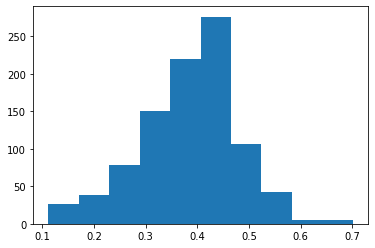

In [146]:
import matplotlib.pyplot as plt

plt.hist(similarity_vec)

In [154]:
for i_item in ingrs_vocab_arr:
    if i_item == 'satsumas':
        print('eeeg')

In [22]:
from strsimpy.cosine import Cosine
### WORKS GREAT WITH K=2, only one it can't get is satsumas
cosine = Cosine(k=2)

ingredient_mapping = {}
for g_item in grocery_vocab:
    sim_arr = []
    sim_np = None
    for i_item in ingrs_vocab_arr:
        dist = cosine.distance(g_item, i_item)
        sim_arr.append(dist)
    sim_np = np.array(sim_arr)
    sorted_sim_top_5 = np.argsort(sim_np)[:20]
    #closest_idx = sim_np.argmin()
    for ingr_idx in sorted_sim_top_5:
        if g_item in ingredient_mapping.keys():
            ingredient_mapping[g_item].append(ingrs_vocab_arr[ingr_idx])
        else:
            ingredient_mapping[g_item] = [ingrs_vocab_arr[ingr_idx]]
ingredient_mapping

{'Apple': ['apple',
  'applejack',
  'pineapple',
  'crabapples',
  'applesauce',
  'fiber_supplement',
  'ale',
  'triple_sec',
  'kale',
  'plum',
  'leek',
  'mole',
  'sole',
  'oleo',
  'splenda_brown_sugar_blend',
  'splenda_granular',
  'whipped_topping',
  'boule',
  'chile',
  'dumpling_wrappers'],
 'Avocado': ['avocado',
  'advocaat',
  'hass_avocadoes',
  'haddock',
  'calvados',
  'alcaparrado',
  'caciocavallo',
  'cardoon',
  'cacao',
  'tapioca',
  'tostados',
  'macadamias',
  'cachaca',
  'adobo_sauce',
  'cavolo_nero',
  'burdock_root',
  'maca',
  'shad',
  'hock',
  'dove'],
 'Banana': ['banana',
  'grana_padano',
  'dried_banana_pieces',
  'ganache',
  'sultana',
  'sucanat',
  'creme_de_banane',
  'canadian_rye_whisky',
  'pomegranate',
  'bran',
  'tuna',
  'finnan_haddie',
  'xanthan_gum',
  'sambuca_romana',
  'pandan_leaves',
  'empanada_wrappers',
  'besan',
  'panir',
  'candy',
  'beans'],
 'Kiwi': ['kiwi',
  'wine',
  'swiss_chard',
  'witch_hazel',
  'kit